# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
!pip install scikit-learn==1.1.0

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках.

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

def ls(x_line, y_line):
  x = np.concatenate((x_line, np.ones((x_line.shape[0],1))), axis=1)
  result = np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y_line))
  return result[:1], result[-1]

def mse(true, pred):
    return np.mean((true - pred)**2)

def mae(true, pred):
    return np.mean(np.abs(true - pred))

In [ ]:
w, b = ls(X_train, y_train)
print('w:', w[0], '\nb:', b)
print('MSE:', mse(y_train,  X_train.reshape(-1, 1).dot(w[0]) + b), '\nMAE:', mae(y_train,  X_train.reshape(-1, 1).dot(w[0]) + b))

w: 10.200247920810954 
b: -4.220843004770136
MSE: 1891.5729141254715 
MAE: 35.50809825001696


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
sk_w = model.coef_[0]
sk_b = model.intercept_
sk_mse = mean_squared_error(y_train, model.predict(X_train))
sk_mae = mean_absolute_error(y_train, model.predict(X_train))
print('w:', sk_w, '\nb:', sk_b)
print('MSE:', sk_mse, '\nMAE:', sk_mae)

w: 10.200247920810956 
b: -4.220843004770134
MSE: 122.98740205272686 
MAE: 9.089622650978999


## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

x_2 = data['x_train'].reshape(-1, 1)
y_2 = data['y_train'].reshape(-1, 1)
w_2, b_2 = ls(x_2, y_2)

print('w:', w_2[0][0], '\nb:', b_2[0])
print('MSE:', mse(y_2,  x_2.dot(w_2[0]) + b_2), '\nMAE:', mae(y_2,  x_2.dot(w_2[0]) + b_2))

w: -0.28454186151674965 
b: 1.9128720096597858
MSE: 0.8297327580353651 
MAE: 0.7476467360067441


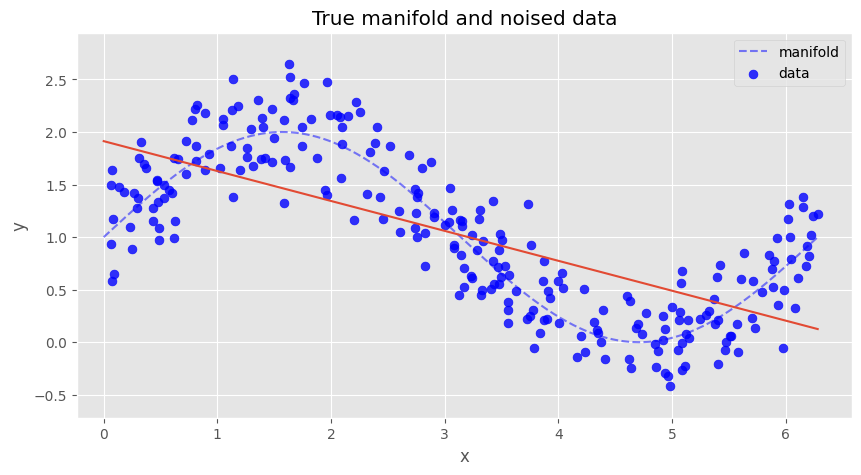

In [ ]:
plt.figure(figsize=(10, 5))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'b', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right')
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data['support'], data['support'].reshape(-1, 1).dot(w_2) + b_2, label='predicted')
plt.show()

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$

## Задание 3.3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней.
### Полином какой степени подходит больше других? Почему?

def plot_builder(i):
  plt.figure(figsize=(10, 5))
  margin = 0.3
  plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
  plt.scatter(data['x_train'], data['y_train'], 40, 'b', 'o', alpha=0.8, label='data')
  plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
  plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
  plt.legend(loc='upper right')
  plt.xlabel('x')
  plt.ylabel('y')
  polynomial_regression = Pipeline([('polynomial_features', PolynomialFeatures(degree=i)),('linear_regression', LinearRegression())])
  polynomial_regression.fit(data['x_train'].reshape(-1, 1), data['y_train'])
  scores = cross_val_score(polynomial_regression, data['x_train'].reshape(-1, 1), data['y_train'], scoring="neg_mean_squared_error", cv=10)
  plt.title('Degree = {} \nMSE = {}'.format(i, -scores.mean()))
  plt.plot(data['x_train'], polynomial_regression.predict(data['x_train'].reshape(-1, 1)), label='predicted')
  plt.show()
  return -scores.mean(), i

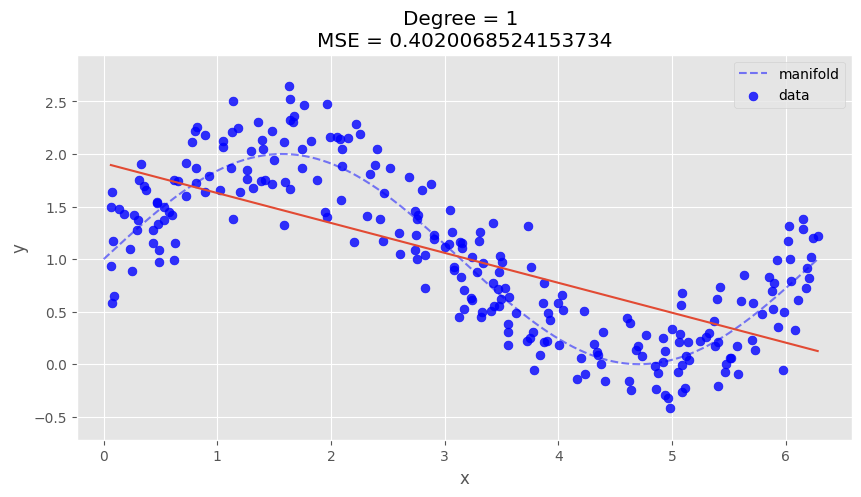

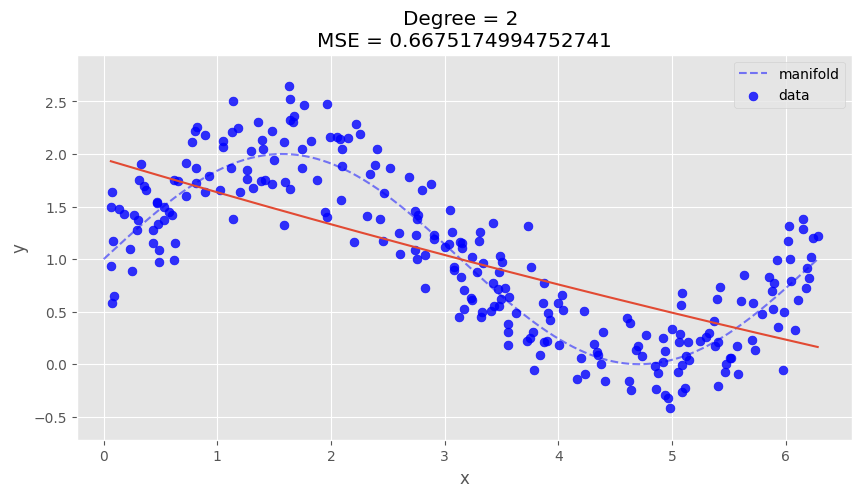

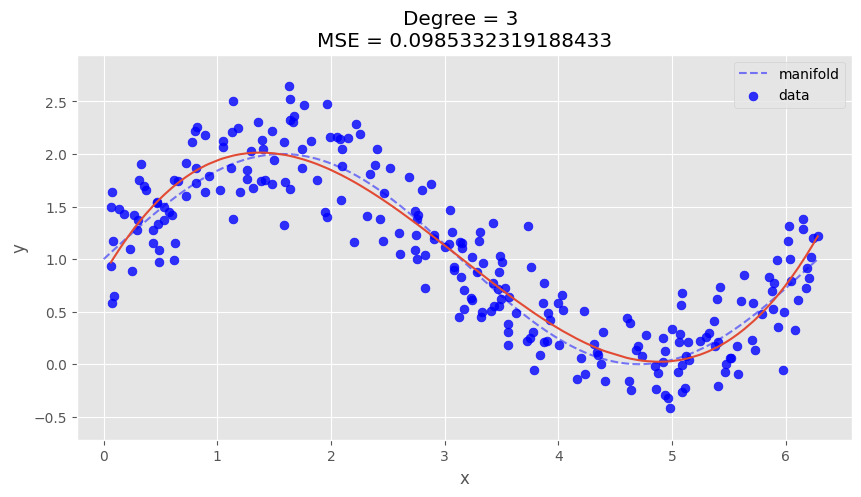

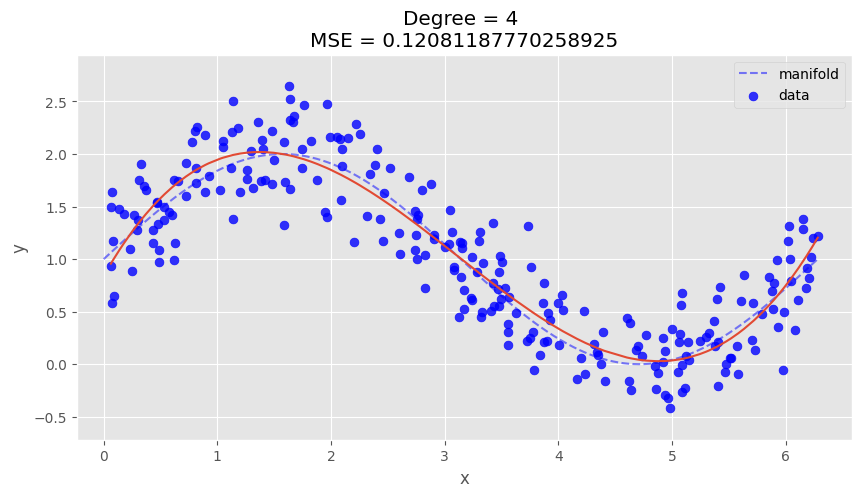

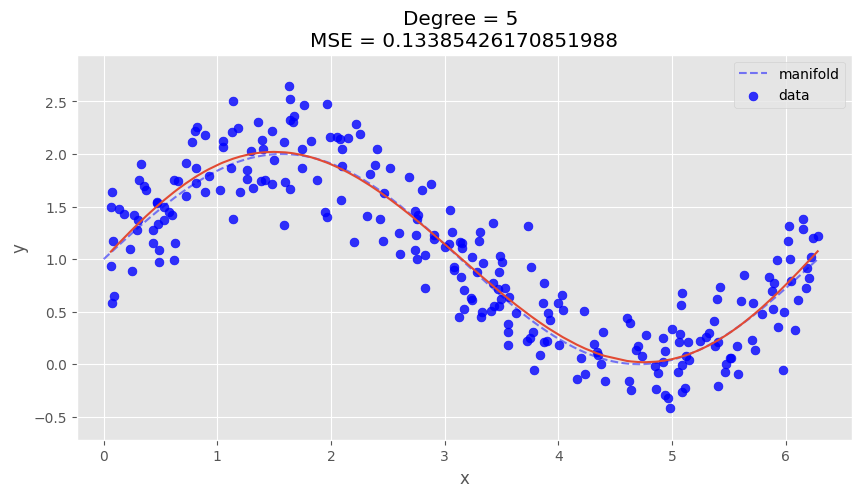

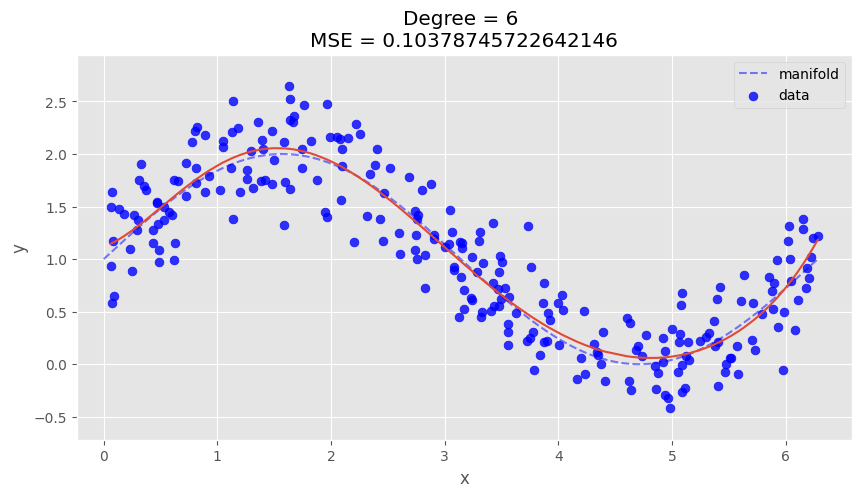

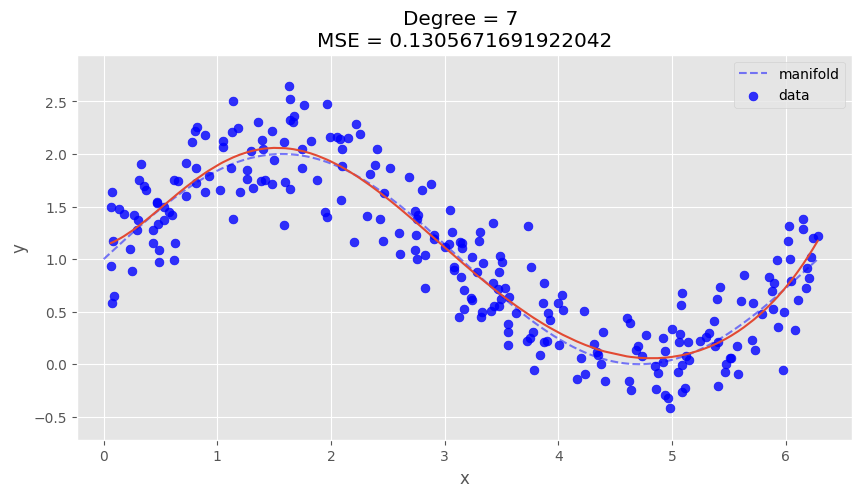

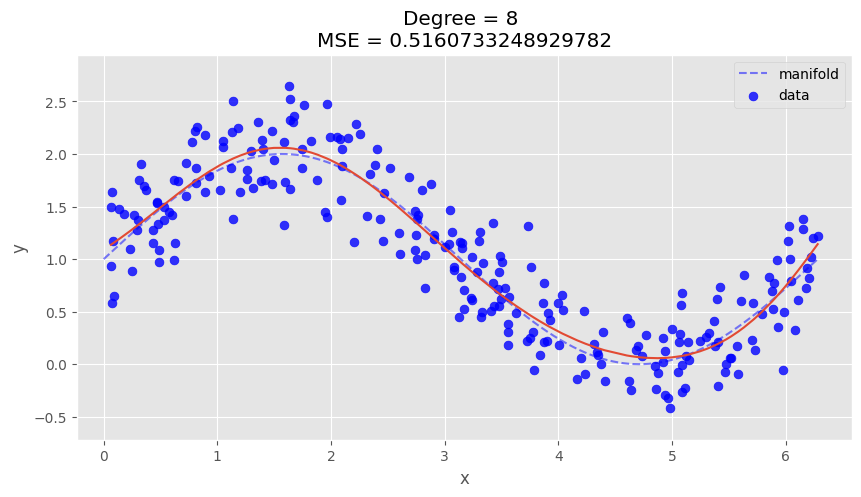

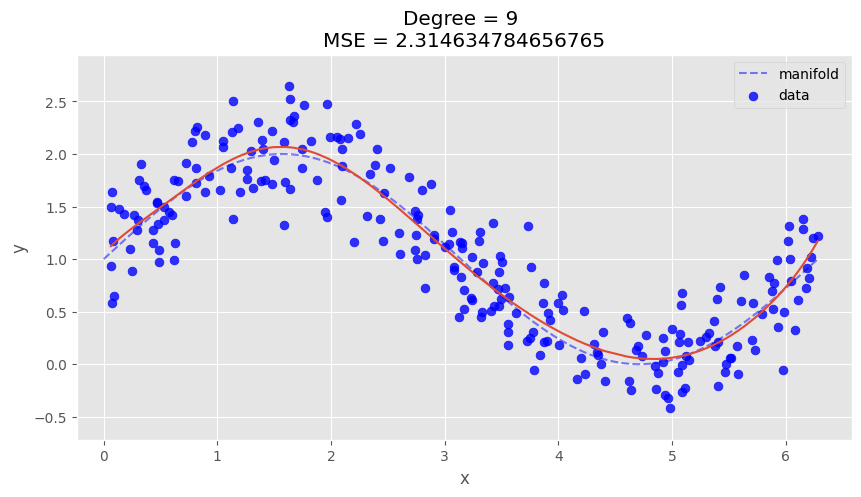

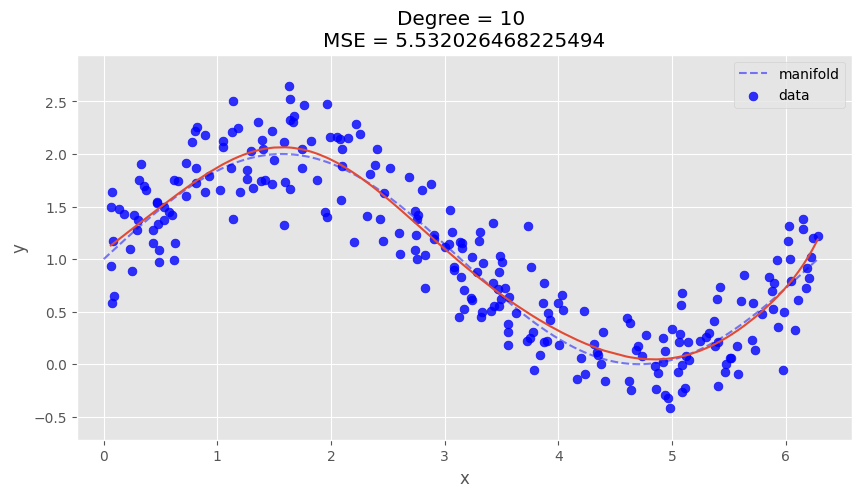

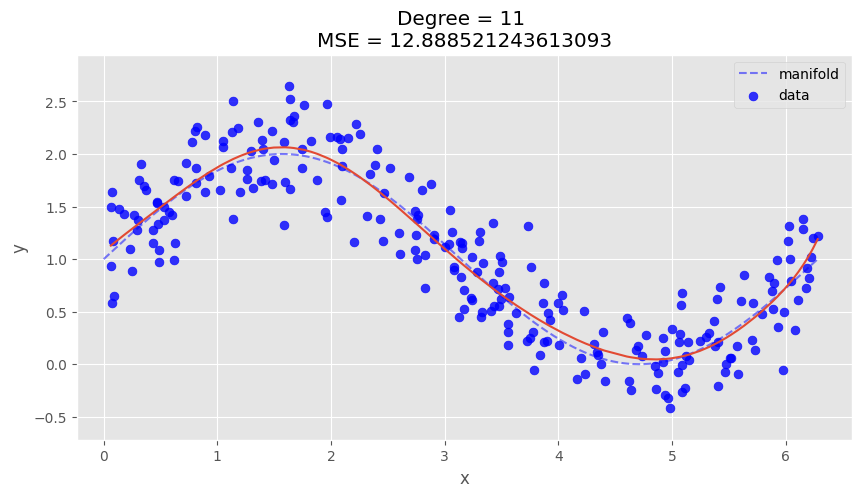

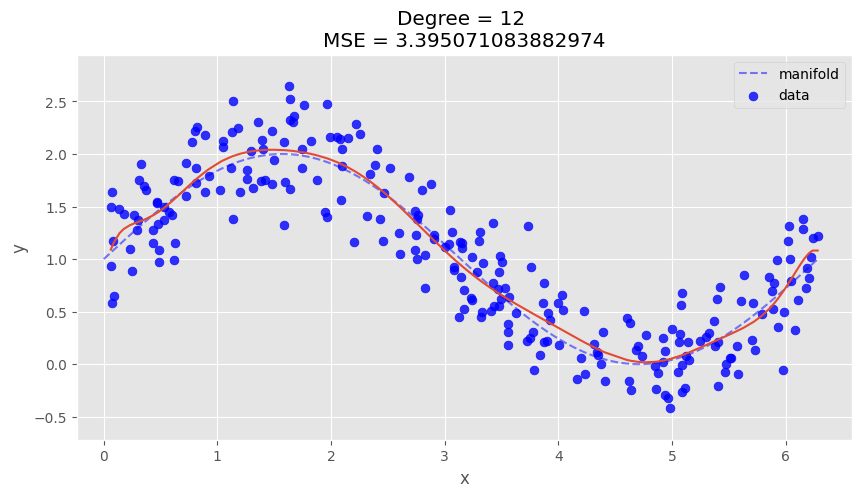

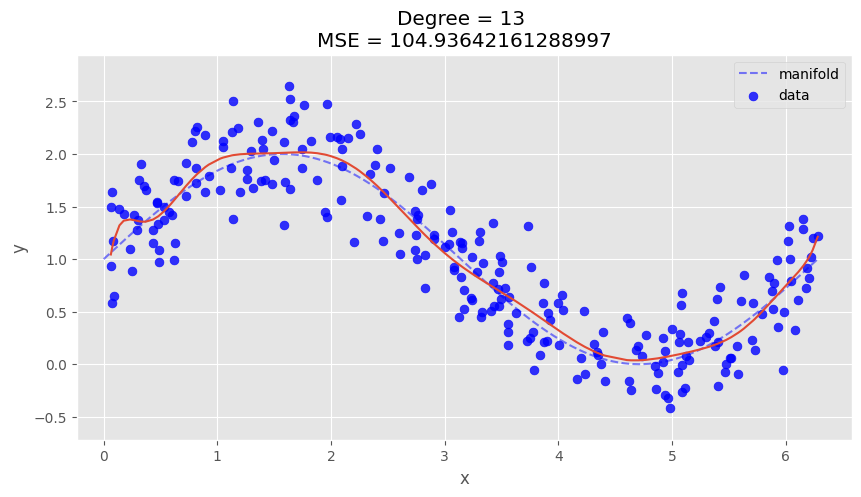

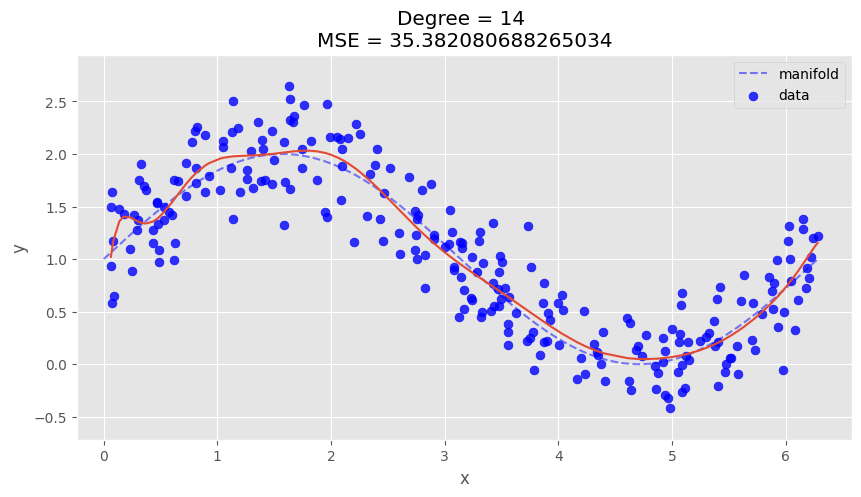

In [ ]:
poly = []
for i in range(1, 15):
   poly.append(plot_builder(i))

In [ ]:
print('Best polynomial with degree:', poly.index(min(poly)) + 1)

Best polynomial with degree: 5


###Вывод 3.3

Проведя несколько тестовможно увидеть что наилучшими полиномами являются полиномы степери 3, 4, 5. Почему это так? Если мы возьмем полиномы меньшей степени, то увидим что на нашей моделе значение ошибки не достаточно мала, т.е используем простые модели. Если мы возьмем полиномы большей степени, то увидим что на нашей модели значения ошибки с увеличением степени растет, т.е мы используем избыточно сложные модели. В полиномах степени 3-5 ошибка минимальная.

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
!pip install scikit-learn==1.1.0

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
house_data = load_boston()
info_house_data = pd.DataFrame(data=house_data.data,
                     columns=house_data.feature_names)
info_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## Задание 3.4

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def get_y_predict():
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

  scaler = StandardScaler()
  model = LinearRegression()

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  model.fit(X_train, y_train)

  return y_train, model.predict(X_train), y_test, model.predict(X_test), model.coef_

def print_mse_mae(y_train, y_train_prediction, y_test, y_test_prediction):
  print('Train MSE:', mean_squared_error(y_train, y_train_prediction), '\nTrain MAE:', mean_absolute_error(y_train, y_train_prediction))
  print('Test MSE:', mean_squared_error(y_test, y_test_prediction), '\nTest MAE:', mean_absolute_error(y_test, y_test_prediction))

In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

y_train, y_train_prediction, y_test, y_test_prediction, w = get_y_predict()
print_mse_mae(y_train, y_train_prediction, y_test, y_test_prediction)

data = pd.DataFrame(data={"coef": w, "feats": X.columns})
data = data.iloc[(-np.abs(data["coef"].values)).argsort()].head(7)
X = X[data["feats"]]
print('\nTop 7:')
y_train, y_train_prediction, y_test, y_test_prediction, w = get_y_predict()
print_mse_mae(y_train, y_train_prediction, y_test, y_test_prediction)

Train MSE: 17.110479832743874 
Train MAE: 2.97606799366386
Test MSE: 36.00676100506934 
Test MAE: 3.9512956790597475

Top 7:
Train MSE: 24.390327200900092 
Train MAE: 3.49272895907675
Test MSE: 23.432484739614676 
Test MAE: 3.472221073931271


###Вывод 3.4

Т.к мы оставили только 7 наиболее значимых признаков, модель стала легче по сравнению с изначальной. Следовательно произошла незначительная потеря точности (значения метрик качества у усеченного датасета выше, чем у полного). Но скорость работы увиличилась засчет уменьшения количества данных